In [1]:
## Important Options:
run_epochs = 300 
run_model_type = "semi_y_CCVAE"

run_save_folder = "../../outputs/experiments_test/freyfaces/ccvae/" 
run_read_data_folder = "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;



In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --y-clean-prior 0.6 \
    --lr 1e-3 \
    --q-y-x-coeff 10000.0 \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=False, kl_anneal_cycles=1, kl_anneal_delay_epochs=5, kl_anneal_ratio=0.5, kl_anneal_start=1e-06, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_CCVAE', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/cvae/', q_y_x_coeff=10000.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=560, size_output=560, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='10_samples_per_class', use_batch_norm=Fa

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [7]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [8]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7fb1a12cc670>
dict_main_vars         dict             n=51
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7fb05920a5e0>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>yfaces/cvae/semi_y_CCVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7fb05b9c7b80>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [9]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [10]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_CCVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [11]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [12]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [13]:


# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [14]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [15]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [16]:
dataset_obj.cont_means

154.0488358778626

In [17]:
dataset_obj.cont_stds

48.54248012196572

In [18]:
X_train_clean.view(-1,28,20)

tensor([[[-3.3061e-01,  3.2860e-01,  4.9341e-01,  ..., -9.8983e-01,
          -1.0310e+00,  8.1396e-02],
         [-8.6623e-01,  1.6380e-01,  3.2860e-01,  ..., -6.6022e-01,
          -1.1546e+00, -2.1607e-02],
         [-9.0743e-01,  1.2260e-01,  2.8740e-01,  ..., -3.3061e-01,
          -1.2370e+00, -1.2461e-01],
         ...,
         [ 8.1396e-02, -2.0701e-01, -4.9542e-01,  ...,  9.6722e-01,
           8.6422e-01,  6.9941e-01],
         [ 6.0795e-02, -1.0401e-01, -5.3662e-01,  ...,  9.0542e-01,
           8.6422e-01,  6.9941e-01],
         [ 1.9594e-02, -1.0401e-01, -5.1602e-01,  ...,  9.4662e-01,
           8.4361e-01,  6.5821e-01]],

        [[ 2.6680e-01,  6.7881e-01,  7.6121e-01,  ..., -8.0443e-01,
          -1.6284e+00, -3.9242e-01],
         [ 1.4320e-01,  5.5521e-01,  5.9641e-01,  ..., -1.2461e-01,
          -1.8551e+00, -4.1302e-01],
         [ 1.4320e-01,  4.3160e-01,  5.3461e-01,  ...,  3.2860e-01,
          -1.8963e+00, -5.3662e-01],
         ...,
         [-2.8941e-01, -1

### Load Model

In [19]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (encoder): encMod(
    (encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=560, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (locs): Linear(in_features=50, out_features=16, bias=True)
    (scales): Linear(in_features=50, out_features=16, bias=True)
  )
  (decoder): baseDecoder(
    (activ): ReLU()
    (mod_fw_seq): Sequential(
      (fc_0): Linear(in_features=16, out_features=50, bias=True)
      (activ_0): ReLU()
      (fc_1): Linear(in_features=50, out_features=100, bias=True)
      (activ_1): ReLU()
      (fc_2): Linear(in_features=100, out_features=200, bias=True)
      (activ_2): ReLU()
    )
    (out_cat_linears): Linear(in_features=200, out_feature

### Load Results from Folder

In [20]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [21]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [22]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       323.040602      323.040602            0.0  160.588825   
1         2       242.421230      242.421230            0.0  127.413385   
2         3       198.505341      198.505341            0.0  120.897745   
3         4       161.627486      161.627486            0.0  115.425532   
4         5       133.826799      133.826799            0.0  109.736314   
..      ...              ...             ...            ...         ...   
295     296      -592.877832     -592.877832            0.0 -618.533824   
296     297      -593.876362     -593.876362            0.0 -619.655881   
297     298      -591.663354     -591.663354            0.0 -617.350708   
298     299      -583.954862     -583.954862            0.0 -610.348525   
299     300      -584.589720     -584.589720            0.0 -610.568999   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       13.921636   13.921636            0.996431             0.943994   
1        2.760241    2.760241            0.998144             0.959840   
2        4.241463    4.241463            0.998140             0.961019   
3        3.674515    3.674515            0.997790             0.953928   
4        6.493969    6.493969            0.997767             0.952201   
..            ...         ...                 ...                  ...   
295     24.985582   24.985582            0.990079             0.927341   
296     25.128475   25.128475            0.989486             0.926559   
297     25.031122   25.031122            0.989698             0.929920   
298     25.754438   25.754438            0.989450             0.925279   
299     25.325130   25.325130            0.988799             0.925124   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.944612            0.892230               0.859984   
1             0.923515            0.859366               0.946479   
2             0.936799            0.877552               0.972204   
3             0.968006            0.933004               0.989897   
4             0.966985            0.935589               0.998270   
..                 ...                 ...                    ...   
295           0.986577            0.961519               0.998770   
296           0.985722            0.959876               0.998665   
297           0.985540            0.959563               0.998807   
298           0.985333            0.957935               0.999058   
299           0.984108            0.956933               0.999280   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.827532                        0.818104   
1                  0.933342                        0.719358   
2                  0.969135                        0.726122   
3                  0.987614                        0.684147   
4                  0.997480                        0.626778   
..                      ...                             ...   
295                0.997973                        0.209820   
296                0.997793                        0.209283   
297                0.997989                        0.208941   
298                0.998406                        0.215895   
299                0.998751                        0.213082   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         21.566447                   0.847756   
1                         21.566447                   0.698356   
2                         21.566447                   0.716854   
3                         21.566447                   0.714489   
4                         21.566447                   0.663685   
..                              ...                        ...   
295                       21.566447                   0.699057   
296                       21.566447                   0.685345   
297                       21.566447

In [23]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       177.103844      177.103844            0.0  161.868139   
1         2       128.423983      128.423983            0.0  125.157829   
2         3       124.614906      124.614906            0.0  119.654875   
3         4       118.664905      118.664905            0.0  114.221934   
4         5       115.519613      115.519613            0.0  107.754594   
..      ...              ...             ...            ...         ...   
295     296      -422.634188     -422.634188            0.0 -447.691127   
296     297      -426.473274     -426.473274            0.0 -451.662438   
297     298      -428.527324     -428.527324            0.0 -453.577228   
298     299      -417.911163     -417.911163            0.0 -443.799007   
299     300      -422.140446     -422.140446            0.0 -447.422692   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       14.686330   14.686330            0.996296             0.959931   
1        2.916776    2.916776            0.998087             0.974268   
2        4.548078    4.548078            0.998230             0.977862   
3        4.054880    4.054880            0.998033             0.973550   
4        7.367062    7.367062            0.997807             0.970891   
..            ...         ...                 ...                  ...   
295     24.485618   24.485618            0.989583             0.939282   
296     24.601061   24.601061            0.989673             0.941420   
297     24.425739   24.425739            0.988986             0.940182   
298     25.285453   25.285453            0.989307             0.938704   
299     24.652940   24.652940            0.988669             0.933625   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.964144            0.953106               0.883629   
1             0.943532            0.928180               0.962748   
2             0.960279            0.948059               0.983468   
3             0.987869            0.983072               0.993129   
4             0.984219            0.978002               0.997531   
..                 ...                 ...                    ...   
295           0.996028            0.994561               0.997960   
296           0.995276            0.993792               0.997853   
297           0.994310            0.992435               0.997638   
298           0.994954            0.992877               0.998926   
299           0.992593            0.989930               0.998926   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.882934                        0.910723   
1                  0.965314                        0.726656   
2                  0.986109                        0.749339   
3                  0.994146                        0.711466   
4                  0.997270                        0.621268   
..                      ...                             ...   
295                0.997557                        0.254025   
296                0.997403                        0.259770   
297                0.997199                        0.254687   
298                0.998613                        0.267916   
299                0.998613                        0.255234   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   0.990657   
1                         27.724494                   0.717391   
2                         27.724494                   0.768344   
3                         27.724494                   0.765437   
4                         27.724494                   0.695235   
..                              ...                        ...   
295                       27.724494                   0.906593   
296                       27.724494                   0.920138   
297                       27.724494

In [24]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       177.108877      177.108877            0.0  161.917725   
1         2       129.609515      129.609515            0.0  126.484764   
2         3       124.549845      124.549845            0.0  119.547956   
3         4       117.966647      117.966647            0.0  113.551010   
4         5       116.815041      116.815041            0.0  109.022585   
..      ...              ...             ...            ...         ...   
295     296      -422.722118     -422.722118            0.0 -447.791673   
296     297      -428.647800     -428.647800            0.0 -453.842893   
297     298      -429.180046     -429.180046            0.0 -454.221421   
298     299      -417.933783     -417.933783            0.0 -443.819645   
299     300      -423.401208     -423.401208            0.0 -448.682866   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0       14.686441   14.686441            0.996296             0.959931   
1        2.916739    2.916739            0.998087             0.974268   
2        4.548166    4.548166            0.998230             0.977862   
3        4.055227    4.055227            0.998033             0.973550   
4        7.364324    7.364324            0.997807             0.970891   
..            ...         ...                 ...                  ...   
295     24.477097   24.477097            0.989583             0.939282   
296     24.596155   24.596155            0.989673             0.941420   
297     24.426187   24.426187            0.988986             0.940182   
298     25.280924   25.280924            0.989307             0.938704   
299     24.654801   24.654801            0.988669             0.933625   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.964144            0.953106               0.883629   
1             0.943532            0.928180               0.962748   
2             0.960279            0.948059               0.983468   
3             0.987869            0.983072               0.993129   
4             0.984219            0.978002               0.997531   
..                 ...                 ...                    ...   
295           0.996028            0.994561               0.997960   
296           0.995276            0.993792               0.997853   
297           0.994310            0.992435               0.997638   
298           0.994954            0.992877               0.998926   
299           0.992593            0.989930               0.998926   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                  0.882934                        0.910723   
1                  0.965314                        0.726656   
2                  0.986109                        0.749339   
3                  0.994146                        0.711466   
4                  0.997270                        0.621268   
..                      ...                             ...   
295                0.997557                        0.254025   
296                0.997403                        0.259770   
297                0.997199                        0.254687   
298                0.998613                        0.267916   
299                0.998613                        0.255234   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   0.990657   
1                         27.724494                   0.717391   
2                         27.724494                   0.768344   
3                         27.724494                   0.765437   
4                         27.724494                   0.695235   
..                              ...                        ...   
295                       27.724494                   0.906593   
296                       27.724494                   0.920138   
297                       27.724494

In [25]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [26]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -584.589720
Avg. LOSS_ELBO                             -584.589720
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -610.568999
Avg. KLD_TOT                                 25.325130
Avg. KLD_Z                                   25.325130
AUC Cell nll score                            0.988799
AVPR Cell nll score                           0.925124
AUC Row nll score                             0.984108
AVPR Row nll score                            0.956933
AUC Row class_y score                         0.999280
AVPR Row class_y score                        0.998751
Error lower-bound on dirty pos                0.213082
Error upper-bound on dirty pos               21.566447
Error repair on dirty pos                     0.688412
Error repair on clean pos                     0.250370
Error repair on clean pos - dirty points      0.434647
Name: 299,

In [27]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -422.140446
Avg. LOSS_ELBO                             -422.140446
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -447.422692
Avg. KLD_TOT                                 24.652940
Avg. KLD_Z                                   24.652940
AUC Cell nll score                            0.988669
AVPR Cell nll score                           0.933625
AUC Row nll score                             0.992593
AVPR Row nll score                            0.989930
AUC Row class_y score                         0.998926
AVPR Row class_y score                        0.998613
Error lower-bound on dirty pos                0.255234
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.941892
Error repair on clean pos                     0.316399
Error repair on clean pos - dirty points      0.532201
Name: 299,

### Test Dataset Final Results

In [28]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -423.401208
Avg. LOSS_ELBO                             -423.401208
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -448.682866
Avg. KLD_TOT                                 24.654801
Avg. KLD_Z                                   24.654801
AUC Cell nll score                            0.988669
AVPR Cell nll score                           0.933625
AUC Row nll score                             0.992593
AVPR Row nll score                            0.989930
AUC Row class_y score                         0.998926
AVPR Row class_y score                        0.998613
Error lower-bound on dirty pos                0.255234
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                     0.941892
Error repair on clean pos                     0.316399
Error repair on clean pos - dirty points      0.532201
Name: 299,

## PLOTS TRAIN DATASET

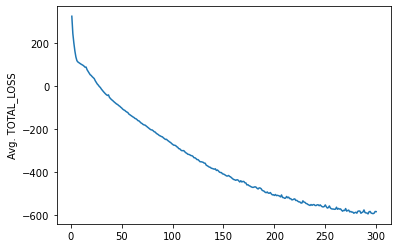

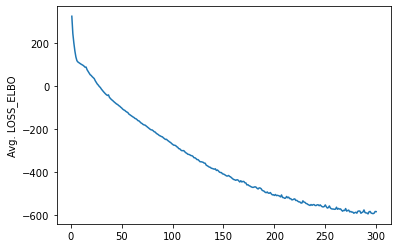

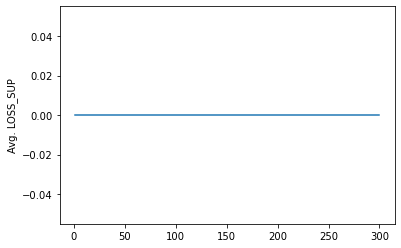

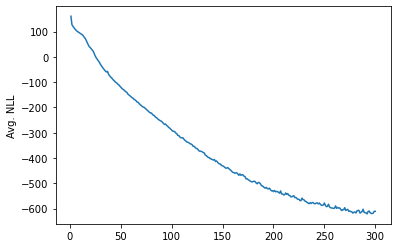

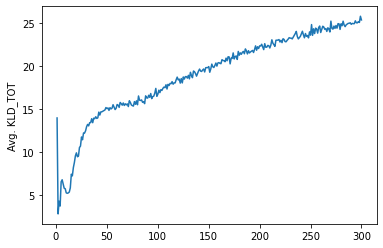

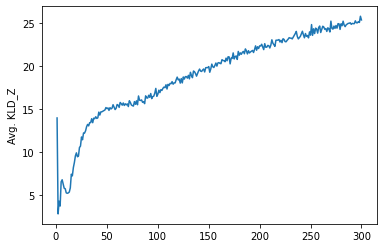

In [29]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

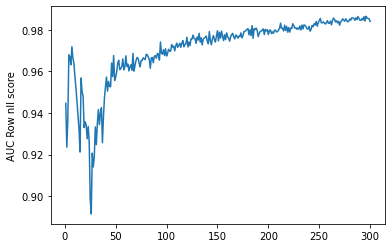

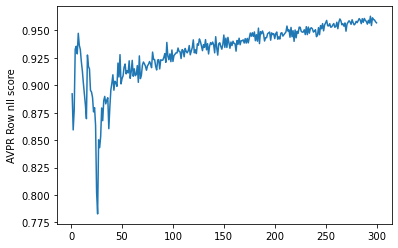

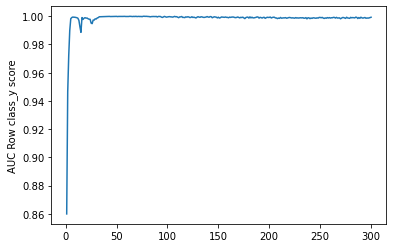

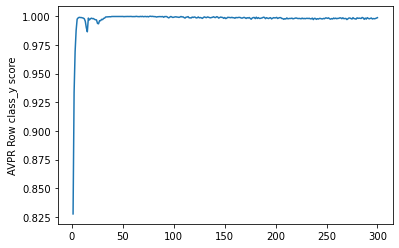

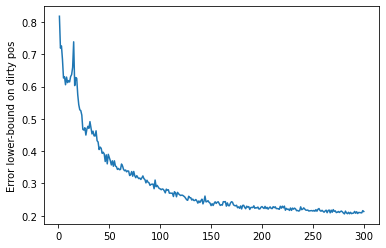

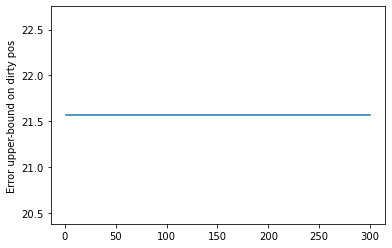

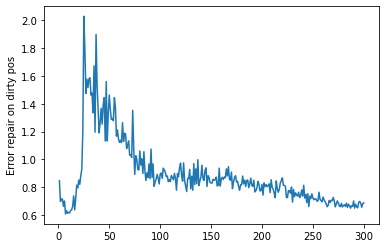

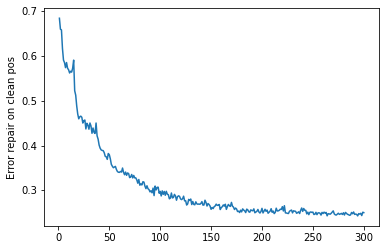

In [30]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

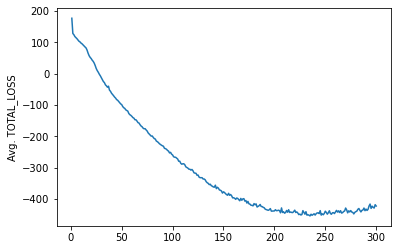

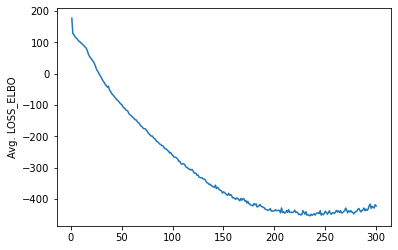

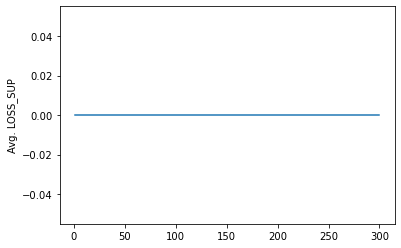

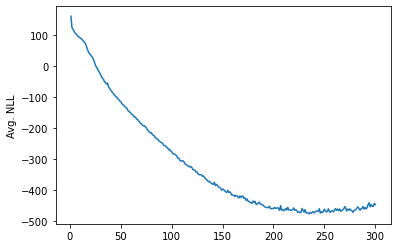

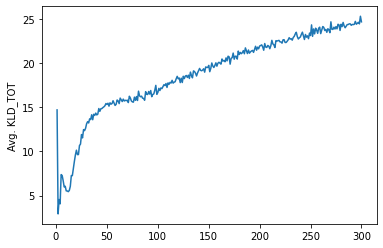

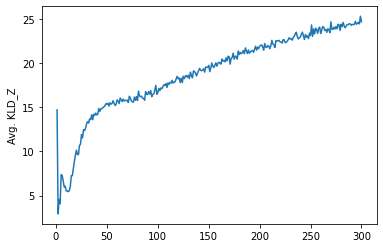

In [31]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

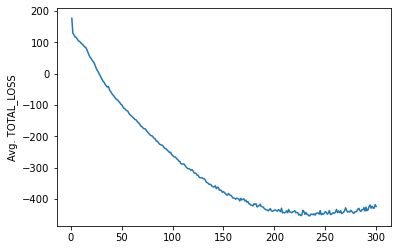

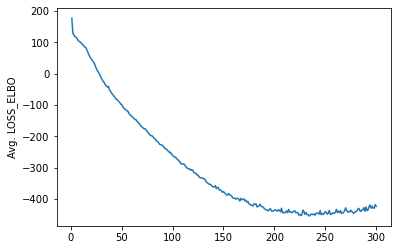

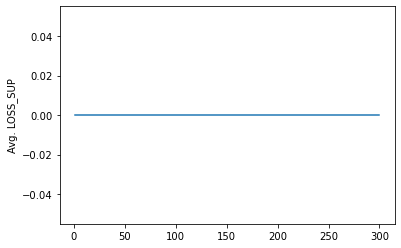

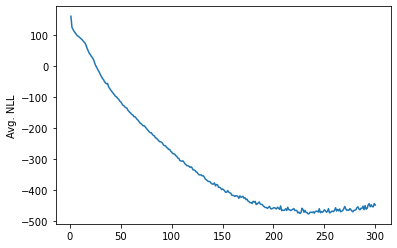

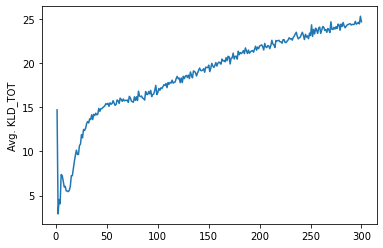

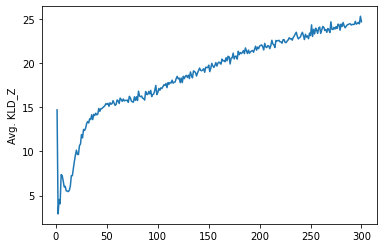

In [32]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [33]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [34]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [6.0259385e+00 1.4123914e-03 9.0791202e-01 3.3669369e-03 8.9752603e-01
 9.4799501e-01 9.9287385e-01 9.5970583e-01 9.7425824e-01 9.3743539e-01
 1.0074545e-03 1.0147686e+00 9.1143465e-01 9.5908035e-04 2.5554388e-03
 1.1709715e-03] 

median of variances (per dim), dirty: 
 [7.1230307e-03 1.4123914e-03 9.0791202e-01 3.3669369e-03 8.9752603e-01
 9.4799501e-01 9.9287385e-01 9.5970583e-01 9.7425824e-01 9.3743539e-01
 1.0074545e-03 1.0147686e+00 9.1143465e-01 9.5908035e-04 2.5554388e-03
 1.1709715e-03] 

median of means (per dim), clean: 
 [ 2.3612125  -0.19543786  0.00268603 -0.301278    0.02393842  0.00737953
  0.01979255  0.00810157 -0.01905878  0.01770853  0.10214796 -0.00501989
  0.01766298 -0.38655812 -0.35095385 -0.20570555] 

median of means (per dim), dirty: 
 [ 1.3302546  -0.19543786  0.00268603 -0.301278    0.02393842  0.00737953
  0.01979255  0.00810157 -0.01905878  0.01770853  0.10214796 -0.00501989
  0.01766298 -0.38655812 -0.35095385 -0.20

## Recons

In [35]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


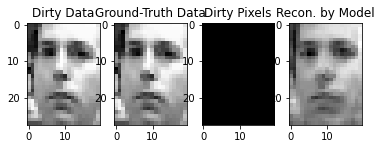

y_noise: 0


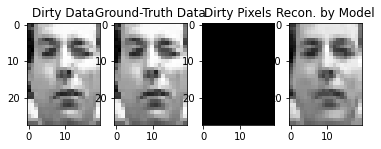

y_noise: 0


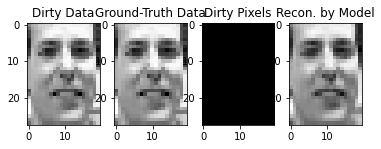

y_noise: 0


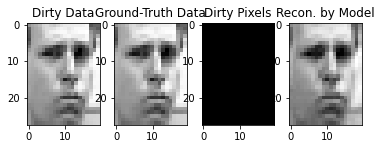

y_noise: 0


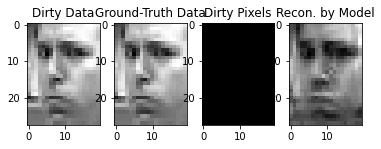

y_noise: 0


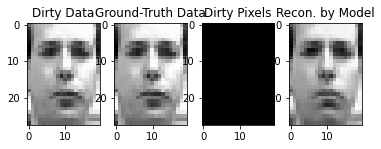

y_noise: 0


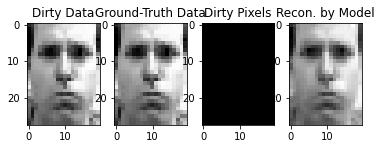

y_noise: 0


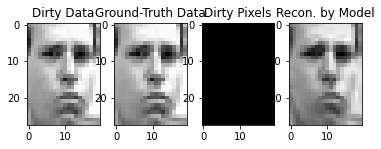

y_noise: 0


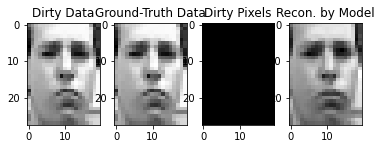

y_noise: 0


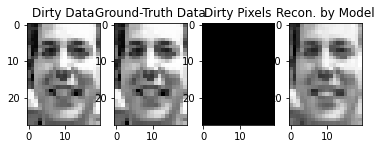

y_noise: 0


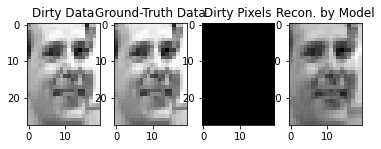

y_noise: 0


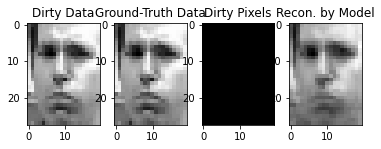

y_noise: 0


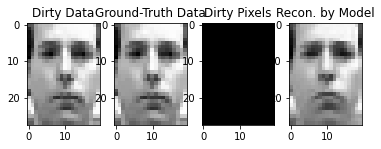

y_noise: 0


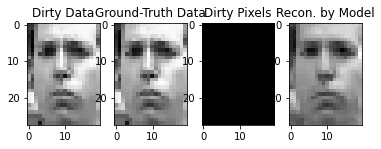

y_noise: 0


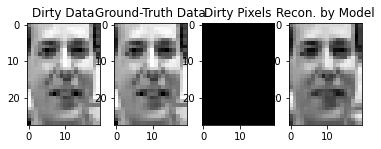

y_noise: 0


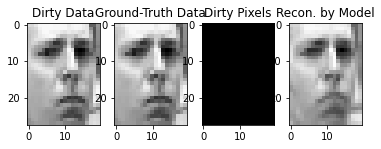

y_noise: 0


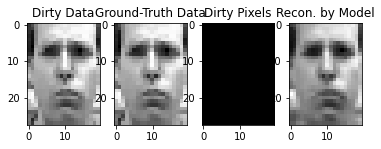

y_noise: 0


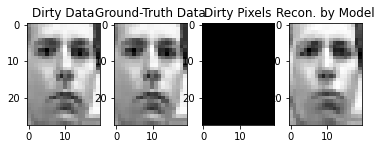

y_noise: 0


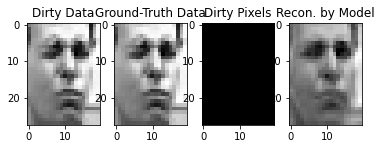

y_noise: 0


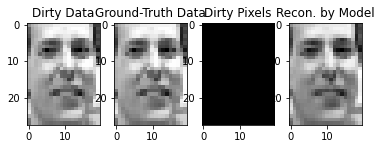

y_noise: 0


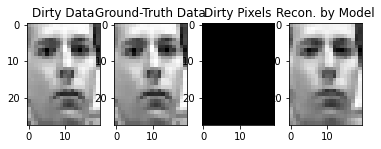

y_noise: 0


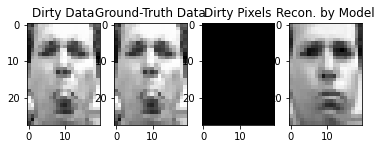

y_noise: 0


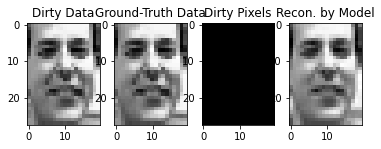

y_noise: 0


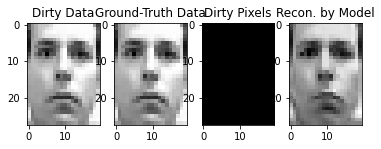

y_noise: 0


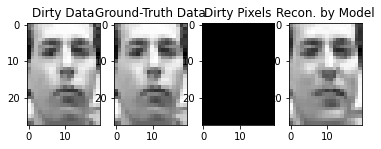

In [36]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


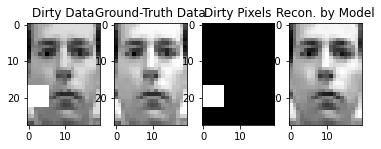

y_noise: 1


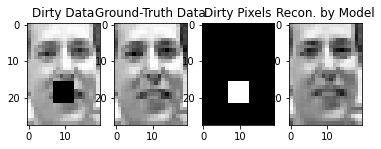

y_noise: 1


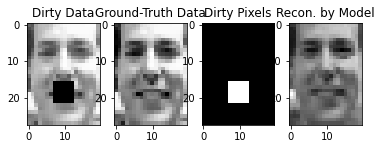

y_noise: 1


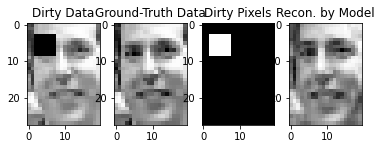

y_noise: 1


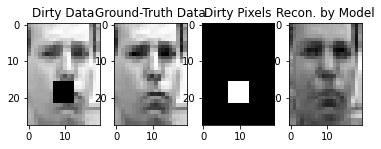

y_noise: 1


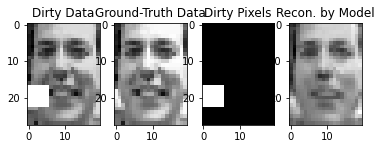

y_noise: 1


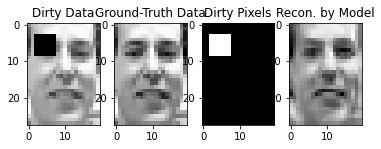

y_noise: 1


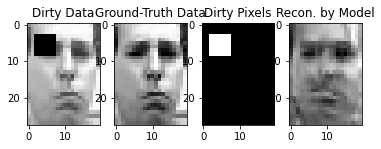

y_noise: 1


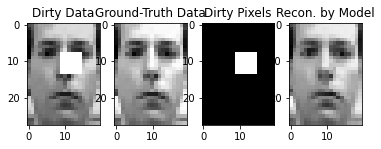

y_noise: 1


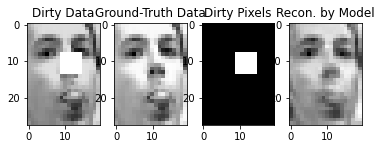

y_noise: 1


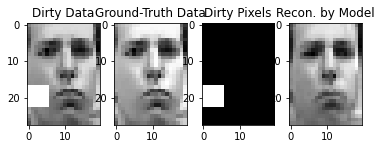

y_noise: 1


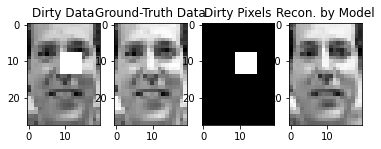

y_noise: 1


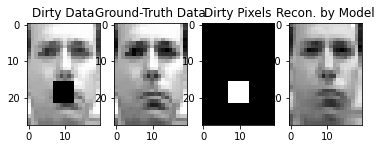

y_noise: 1


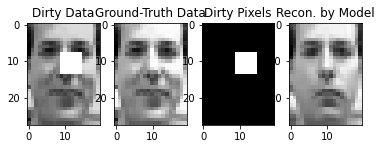

y_noise: 1


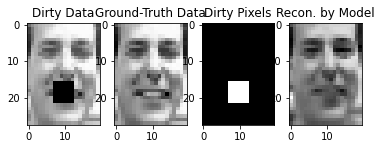

y_noise: 1


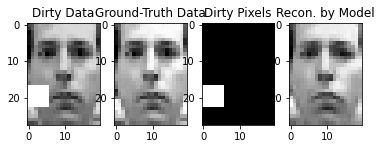

y_noise: 1


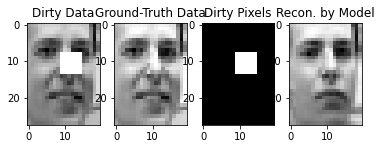

y_noise: 1


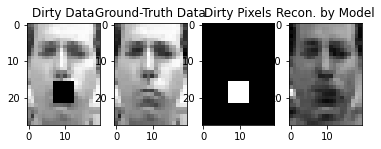

y_noise: 1


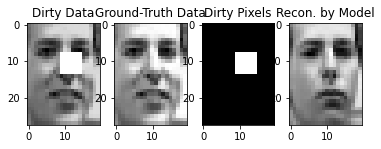

y_noise: 1


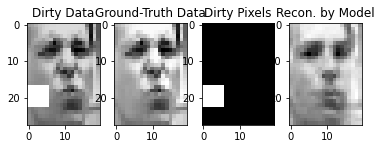

y_noise: 1


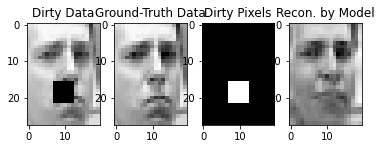

y_noise: 1


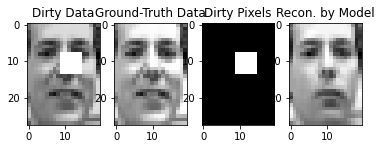

y_noise: 1


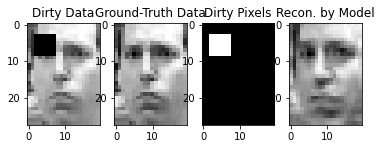

y_noise: 1


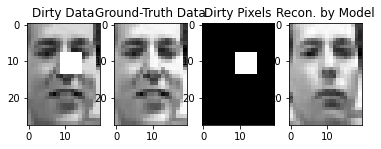

y_noise: 1


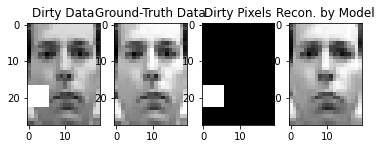

In [37]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [38]:
len(trusted_idxs_train)

50

y_noise: 0


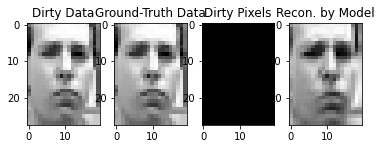

y_noise: 0


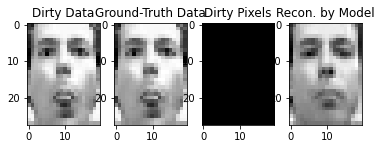

y_noise: 0


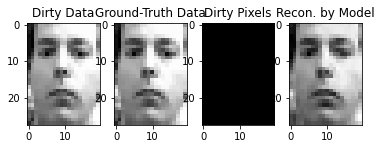

y_noise: 0


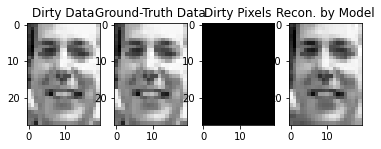

y_noise: 0


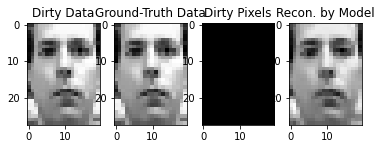

y_noise: 0


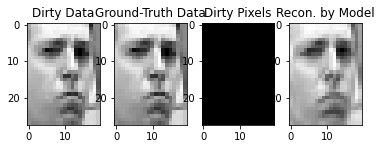

y_noise: 0


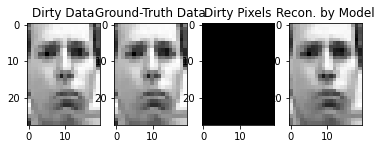

y_noise: 0


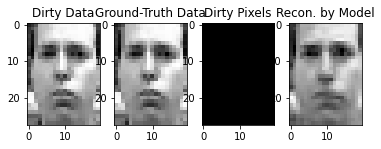

y_noise: 0


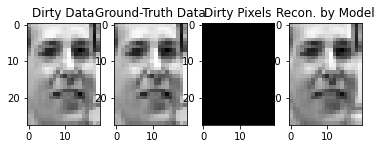

y_noise: 0


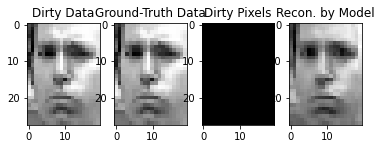

y_noise: 1


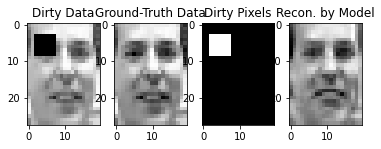

y_noise: 1


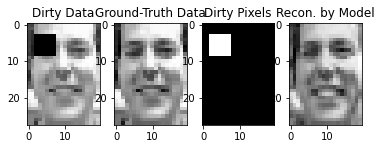

y_noise: 1


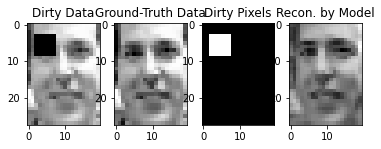

y_noise: 1


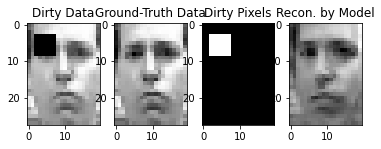

y_noise: 1


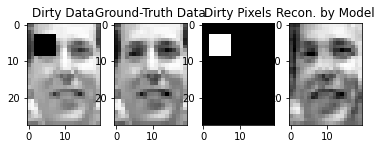

y_noise: 1


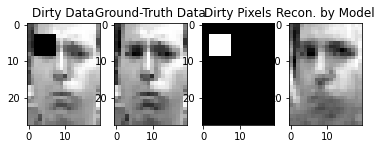

y_noise: 1


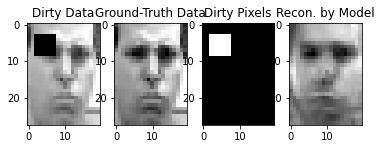

y_noise: 1


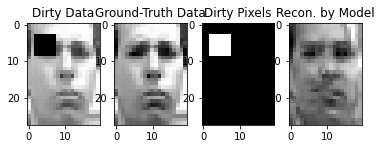

y_noise: 1


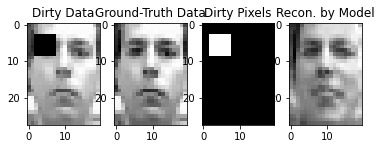

y_noise: 1


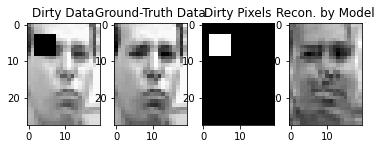

y_noise: 1


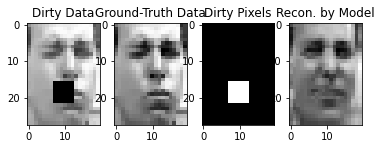

y_noise: 1


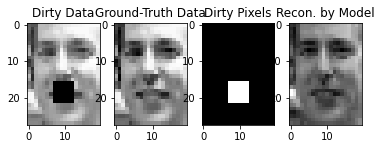

y_noise: 1


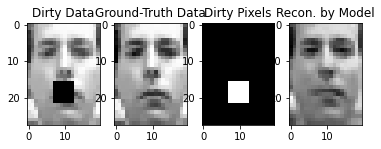

y_noise: 1


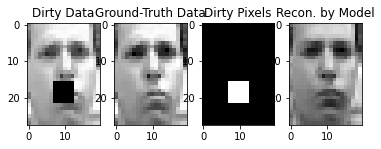

y_noise: 1


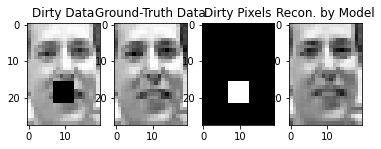

y_noise: 1


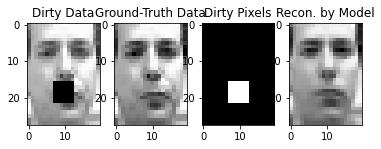

y_noise: 1


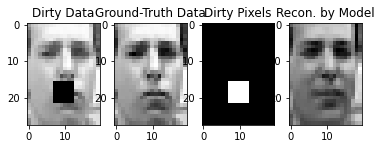

y_noise: 1


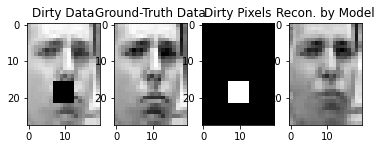

y_noise: 1


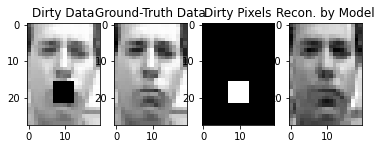

y_noise: 1


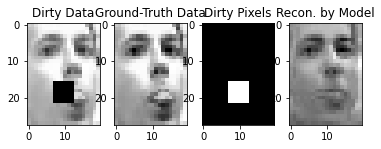

y_noise: 1


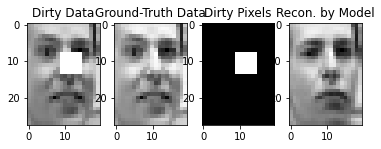

y_noise: 1


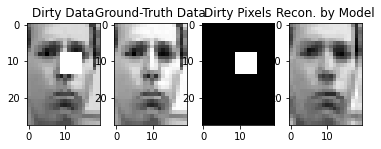

y_noise: 1


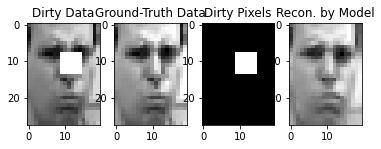

y_noise: 1


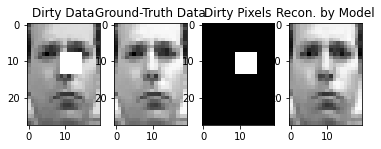

y_noise: 1


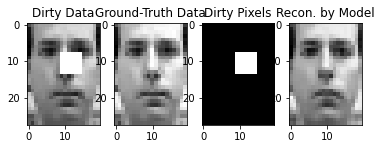

y_noise: 1


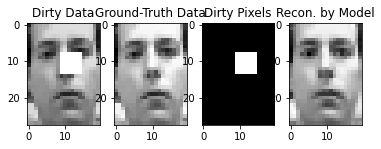

y_noise: 1


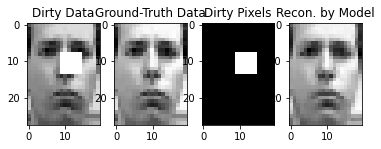

y_noise: 1


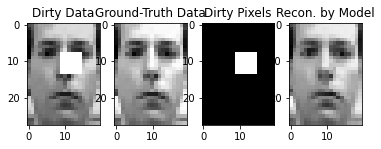

y_noise: 1


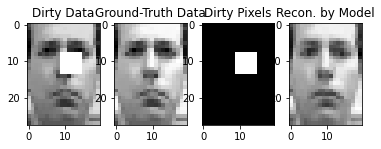

y_noise: 1


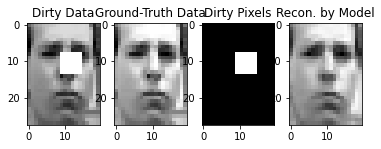

y_noise: 1


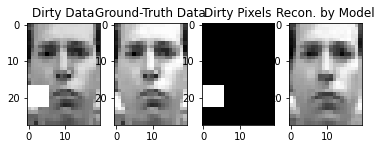

y_noise: 1


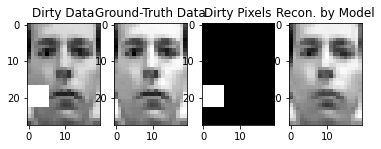

y_noise: 1


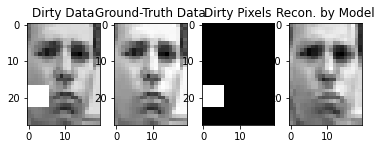

y_noise: 1


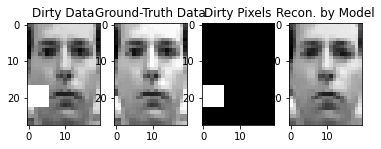

y_noise: 1


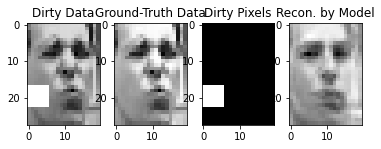

y_noise: 1


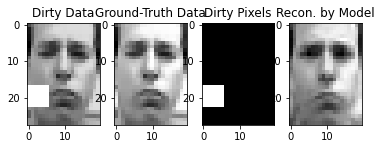

y_noise: 1


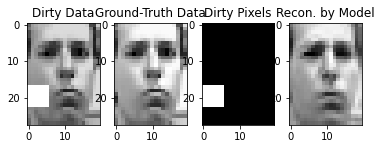

y_noise: 1


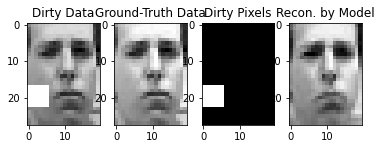

y_noise: 1


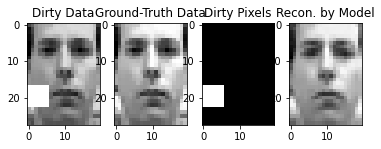

y_noise: 1


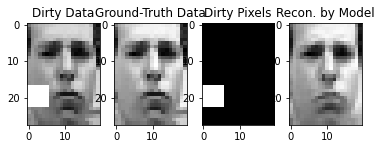

In [39]:
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [40]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [41]:
from sklearn.decomposition import PCA

all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(all_z_train)

PCA(n_components=2)

In [42]:
pca_2d_z.explained_variance_

array([10.809579 ,  2.4272661], dtype=float32)

In [43]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

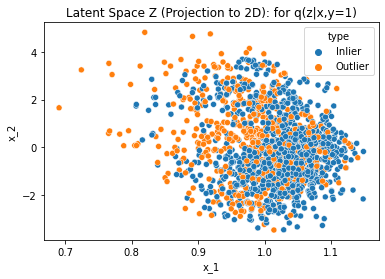

In [44]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

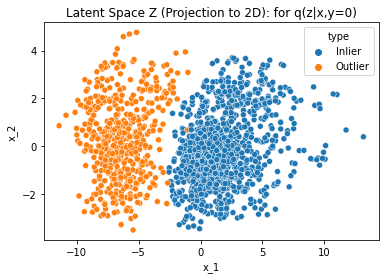

In [45]:
df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
                                   "x_2": z_train_pca2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Kernel PCA

In [46]:
from sklearn.decomposition import KernelPCA

kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(all_z_train)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [47]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

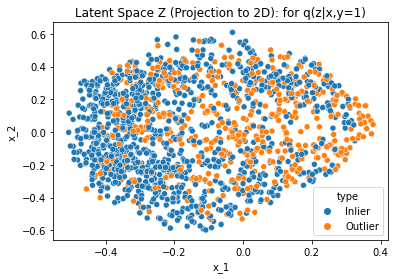

In [48]:
df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                   "x_2": z_train_kpca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

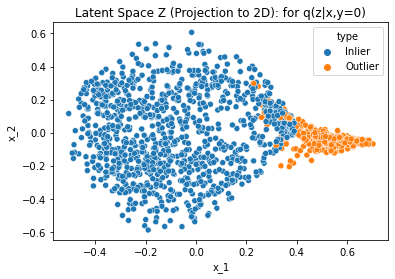

In [49]:
df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
                                    "x_2": z_train_kpca2d_dirty[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [50]:
from sklearn.manifold import TSNE

In [51]:
tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [52]:
_len_dataset = z_train_pca2d_clean.shape[0]

z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

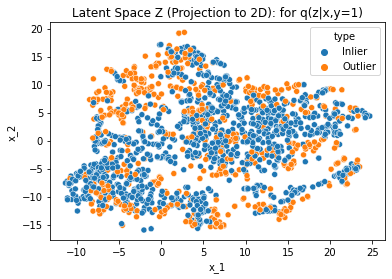

In [53]:
df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

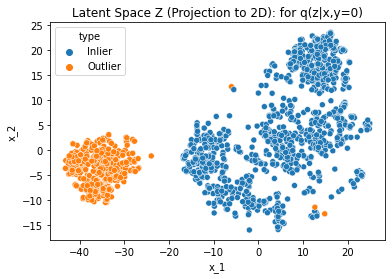

In [54]:
df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
                                   "x_2": z_train_tsne2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Approx. Log-Likelihood

In [55]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [56]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [57]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 40.33it/s]


In [58]:
# print(prof)

In [59]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [60]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0     583.858032  579.250854       clean
1     534.005066  533.153687       clean
2     757.071106  762.659058       dirty
3     738.791992  745.156738       dirty
4     441.197601  438.779816       clean
...          ...         ...         ...
1567  754.257385  753.337524       clean
1568  607.250732  605.196716       clean
1569  428.157440  430.123077       dirty
1570  681.876526  682.231445       clean
1571  391.685364  397.856537       dirty

[1572 rows x 3 columns]

In [61]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

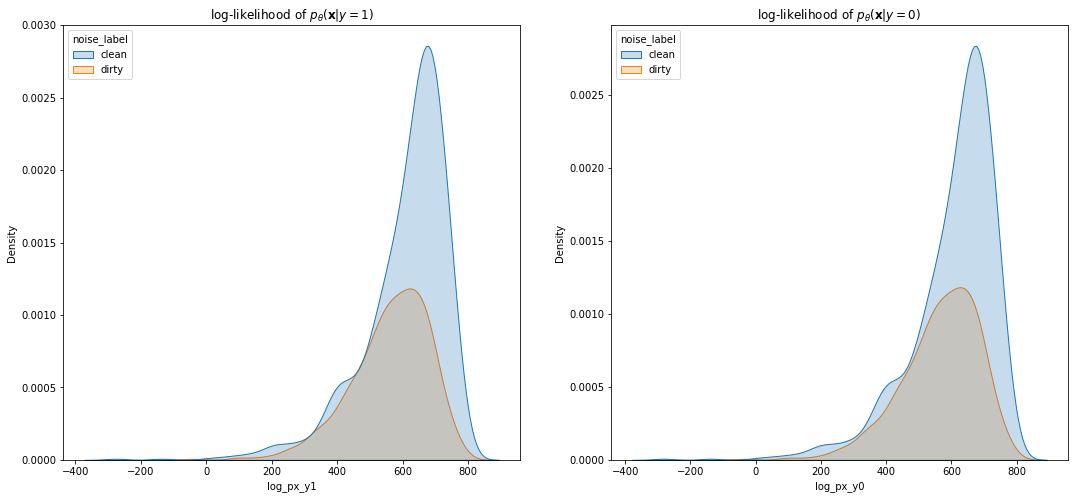

In [62]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)
#_ax = axes[0].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=False, fill=False, stat="density")

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)
#_ax = axes[1].twinx()
#sns.histplot(ax=_ax, data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=False, fill=False, stat="density")

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


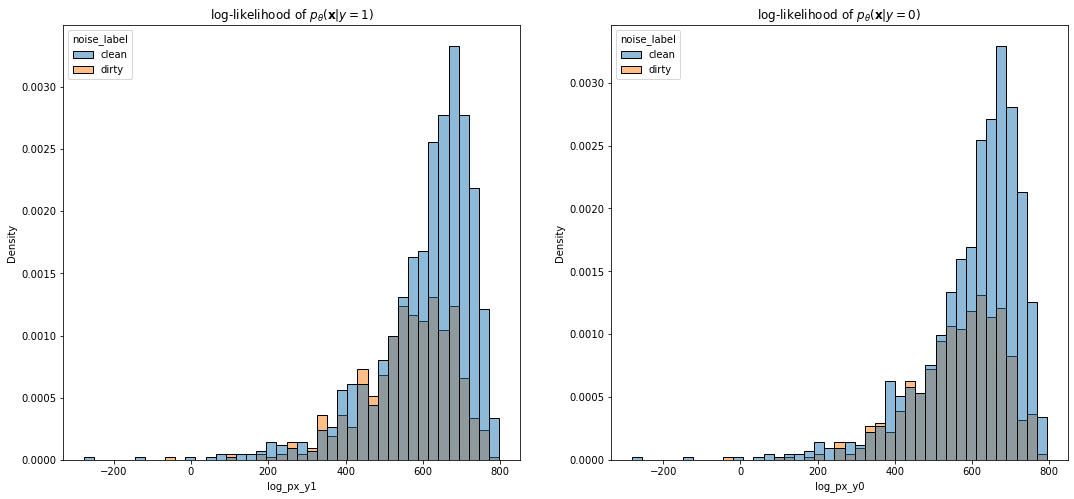

In [63]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [64]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins



In [65]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [66]:
np.sum(np.abs(top_model - top_data))

0.01132010550803608

In [67]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [68]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.7570630642332923